# Autoencoding for clustering of spectroscopic data

---

Lecture: "Physics-augmented machine learning" @ Cyber-Physical Simulation, TU Darmstadt

Lecturer: Prof. Oliver Weeger

Assistants: Dr.-Ing. Maximilian Kannapin, Jasper O. Schommartz, Dominik K. Klein

Summer term 2025

---

Experimental data by Ho et al.: ''Rapid identification of pathogenic bacteria using Raman spectroscopy and deep learning''. Nature Commuications 10:4927 (2019).



*Run the following cell to clone the GitHub repository in your current Google Colab environment.*

In [1]:
!git clone https://github.com/CPShub/LecturePhysicsAwareML.git

Cloning into 'LecturePhysicsAwareML'...
remote: Enumerating objects: 841, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 841 (delta 39), reused 44 (delta 23), pack-reused 745 (from 2)
Receiving objects: 100% (841/841), 141.01 MiB | 18.22 MiB/s, done.
Resolving deltas: 100% (357/357), done.


*Run the following cell to import all modules and python files to this notebook. If you made changes in the python files, run the following cell again to update the python files in this notebook. You might need to restart your Colab session first ("Runtime / Restart session" in the header menu).*


In [2]:
import tensorflow as tf
import datetime
now = datetime.datetime.now
import LecturePhysicsAwareML.Autoencoder.data as ld
import LecturePhysicsAwareML.Autoencoder.models as lm
import LecturePhysicsAwareML.Autoencoder.plots as lp

*Run this cell if you are executing the notebook locally on your device.*

In [1]:
import datetime
import pandas as pd
import tensorflow as tf

import data as ld
import models as lm
import plots as lp

now = datetime.datetime.now

*If you want to clone the repository again, you have to delete it from your Google Colab files first. For this, you can run the following cell.*

In [4]:
%rm -rf LecturePhysicsAwareML

Load full autoencoder and encoder

In [2]:
latent_variables = 2  # number of latent dimensions
nodes = 64            # number of hidden encoder/decoder nodes
feature_number = 1000 # number of measurements per spectrum

# Build full encoder-decoder model
units = [nodes, latent_variables, nodes, feature_number]
activation = ['softplus', 'linear', 'softplus', 'linear']
autoencoder = lm.build(input_shape=feature_number, units=units, activation=activation)

# Build encoder model (for later evaluation of latent variables)
units = [nodes, latent_variables]
activation = ['softplus', 'linear']
encoder = lm.build(input_shape=feature_number, units=units, activation=activation)

Select bacteria sets so be investigated

In [3]:
# define bacteria sets to be investigated (numbers between 0 and 29)
cases = [18, 27, 0, 26]
raman_shift, intensity_spectrum, label = ld.load_data(cases)

# Create a DataFrame with label, raman_shift, and intensity
# Only use the first 5 components of raman_shift and intensity for each row
df = pd.DataFrame({
    'Bacteria class': label,
    'Raman shift': [rs[:5] for rs in raman_shift],
    'Intensity spectrum': [intens[:5] for intens in intensity_spectrum]
})
df

,Bacteria class,Raman shift,Intensity spectrum
0,0.0,"[1792.4, 1791.2, 1789.9, 1788.6, 1787.3]","[0.17051657847653126, 0.21169439263009632, 0.1..."
1,0.0,"[1792.4, 1791.2, 1789.9, 1788.6, 1787.3]","[0.16077867280398928, 0.1591637897967012, 0.28..."
2,0.0,"[1792.4, 1791.2, 1789.9, 1788.6, 1787.3]","[0.19136940341675984, 0.17246924530484747, 0.1..."
3,0.0,"[1792.4, 1791.2, 1789.9, 1788.6, 1787.3]","[0.21299697837150128, 0.22444338422391855, 0.1..."
4,0.0,"[1792.4, 1791.2, 1789.9, 1788.6, 1787.3]","[0.17297492188125954, 0.1529725182277061, 0.19..."
...,...,...,...
195,3.0,"[1792.4, 1791.2, 1789.9, 1788.6, 1787.3]","[0.3646825396825397, 0.3888084513084513, 0.278..."
196,3.0,"[1792.4, 1791.2, 1789.9, 1788.6, 1787.3]","[0.29781241601719965, 0.35517871539908624, 0.2..."
197,3.0,"[1792.4, 1791.2, 1789.9, 1788.6, 1787.3]","[0.48029593758407313, 0.4130589184826473, 0.46..."
198,3.0,"[1792.4, 1791.2, 1789.9, 1788.6, 1787.3]","[0.2588464031108231, 0.5236282134370275, 0.323..."


Define study and calibrate the autoencoder

Epoch 1/500
7/7 - 0s - 45ms/step - loss: 0.1273
Epoch 2/500
7/7 - 0s - 3ms/step - loss: 0.0460
Epoch 3/500
7/7 - 0s - 3ms/step - loss: 0.0315
Epoch 4/500
7/7 - 0s - 3ms/step - loss: 0.0292
Epoch 5/500
7/7 - 0s - 3ms/step - loss: 0.0266
Epoch 6/500
7/7 - 0s - 3ms/step - loss: 0.0231
Epoch 7/500
7/7 - 0s - 3ms/step - loss: 0.0194
Epoch 8/500
7/7 - 0s - 3ms/step - loss: 0.0160
Epoch 9/500
7/7 - 0s - 3ms/step - loss: 0.0132
Epoch 10/500
7/7 - 0s - 3ms/step - loss: 0.0112
Epoch 11/500
7/7 - 0s - 3ms/step - loss: 0.0101
Epoch 12/500
7/7 - 0s - 3ms/step - loss: 0.0093
Epoch 13/500
7/7 - 0s - 3ms/step - loss: 0.0089
Epoch 14/500
7/7 - 0s - 3ms/step - loss: 0.0086
Epoch 15/500
7/7 - 0s - 3ms/step - loss: 0.0085
Epoch 16/500
7/7 - 0s - 3ms/step - loss: 0.0084
Epoch 17/500
7/7 - 0s - 3ms/step - loss: 0.0083
Epoch 18/500
7/7 - 0s - 3ms/step - loss: 0.0082
Epoch 19/500
7/7 - 0s - 3ms/step - loss: 0.0082
Epoch 20/500
7/7 - 0s - 3ms/step - loss: 0.0081
Epoch 21/500
7/7 - 0s - 3ms/step - loss: 0.0080


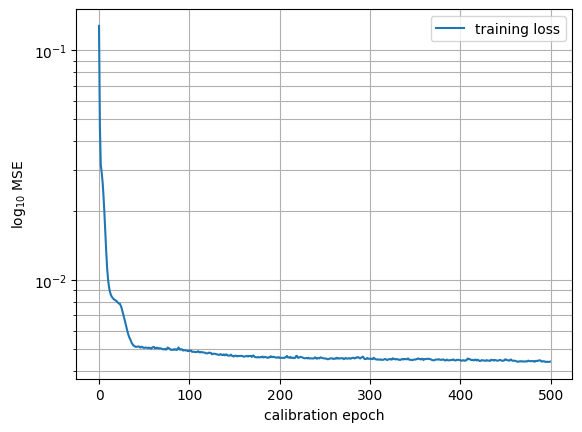

In [4]:
# Fit encoder-decoder model
epochs = 500
h = autoencoder.fit(
    [intensity_spectrum], [intensity_spectrum], epochs=epochs, verbose=2
)

lp.plot_loss(h)

Visualize results

/Users/jaosch/projects/LecturePhysicsAwareML/Autoencoder/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_5']
Received: inputs=Tensor(shape=(200, 1000))
  warnings.warn(msg)
/Users/jaosch/projects/LecturePhysicsAwareML/Autoencoder/plots.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


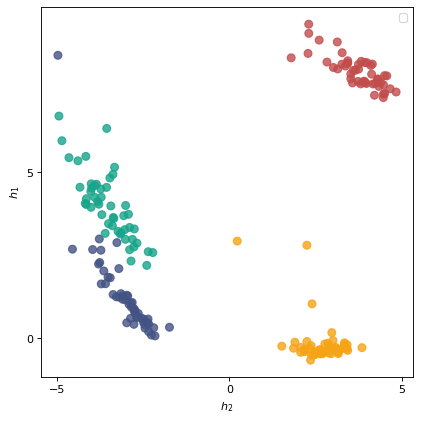

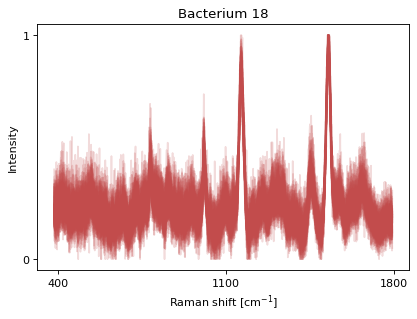

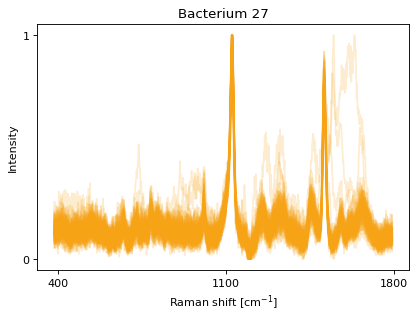

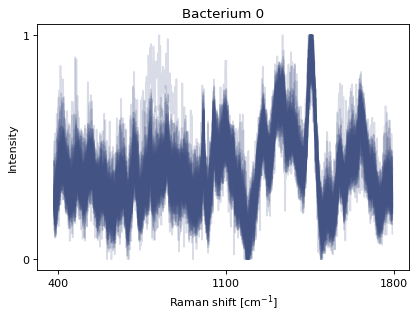

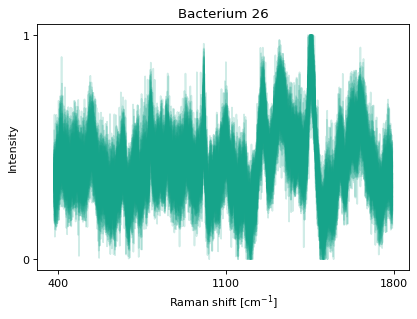

In [5]:
# Transfer weights from the encoder-decoder model to the encoder model
# for evaluation of the latent variables
encoder.set_weights(autoencoder.weights[0:4])

# plot latent space
for i in range(latent_variables):
    for j in range(latent_variables):
        if i != j:
            if i > j:
                lp.plot_latent_space_ij(encoder, intensity_spectrum, label, i, j)

# plot the different bacteria types
for i in range(len(cases)):
    raman_shift, intensity_spectrum = ld.load_single_case(cases[i])
    lp.plot_spectra(raman_shift, intensity_spectrum, i, cases[i])